In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/documents/kaggle'

In [5]:
! kaggle datasets download -d shivkumarganesh/bumble-dating-app-google-play-store-review

Dataset URL: https://www.kaggle.com/datasets/shivkumarganesh/bumble-dating-app-google-play-store-review
License(s): Attribution 4.0 International (CC BY 4.0)
 88% 16.0M/18.3M [00:01<00:00, 24.8MB/s]
100% 18.3M/18.3M [00:01<00:00, 17.2MB/s]


In [6]:
! unzip -qq bumble-dating-app-google-play-store-review.zip
! tar -xf bumble-dating-app-google-play-store-review.zip

tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


In [7]:
data = pd.read_csv('bumble_google_play_reviews.csv')
data.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a33e66ce-bf3f-46c1-8fc4-bcb1bf8eb6e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Waste of money and time had more fakers than r...,2,0,5.382.0,2024-08-31 23:51:20,It's 100% against our Community Guidelines for...,2024-09-01 03:42:38,5.382.0
1,d8cb1521-03b4-4794-8b47-fc4b7c72bc61,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Lumayan,4,0,5.383.0,2024-08-31 23:26:51,NaN,NaN,5.383.0
2,f587a085-d32f-4ae9-a567-227edc3d4acb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,coo l,5,0,5.383.0,2024-08-31 23:22:26,We're so happy to hear that! We love that you ...,2024-09-01 03:11:39,5.383.0
3,b92843c6-1b9e-4e9d-9ea0-ba2373418fe0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,4,0,5.383.0,2024-08-31 23:19:37,We appreciate your kind words. 🙌,2024-09-01 03:11:38,5.383.0
4,ba9ae7e4-b0d4-4990-9631-2422d1e50167,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,5.379.0,2024-08-31 23:12:58,Thanks for your kind words. Your feedback is s...,2024-09-01 03:11:07,5.379.0


In [8]:
data.describe()

,score,thumbsUpCount
count,156504.000000,156504.000000
mean,2.627888,3.097601
std,1.714176,29.814872
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,5.000000,1.000000
max,5.000000,3771.000000


In [ ]:
data.content

0         App cant be removed from your phone even after...
1         It's just terrible, even worse than match grou...
2         As much as I think its nice, its kinda ridicul...
3         its pretty much exactly what you expect, whole...
4                          Too biased for paid subscription
                                ...                        
156178                                        Finally here!
156179                                             Finally!
156180    Finally, an app where women have to start the ...
156181                     At last we have Android version!
156182                                     Nice and smooth.
Name: content, Length: 156183, dtype: object

In [ ]:
data = data[data.content.notna()]
data.shape

(156167, 11)

In [ ]:
data.isna().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    27472
at                          0
replyContent            44961
repliedAt               44961
appVersion              27472
dtype: int64

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yunes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yunes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yunes\AppData\Roaming\nltk_data...


True

In [ ]:
X = data.content.apply(lambda x: word_tokenize(x))
X

,content
0,"[tu, da, 5, like, e, acabou, os, like, gratuit..."
1,"[yo, i]"
2,"[try, to, purchase, premium, ., and, say, awai..."
3,"[it, 's, ok]"
4,"[nice, 🙂]"
...,...
155862,"[Finally, here, !]"
155863,"[Finally, !]"
155864,"[Finally, ,, an, app, where, women, have, to, ..."
155865,"[At, last, we, have, Android, version, !]"


In [ ]:
X = X.to_list()

In [ ]:
X[9]

['No',
 'free',
 'features',
 ',',
 'even',
 'basic',
 'things',
 'you',
 'should',
 'pay',
 'for',
 '?',
 '!',
 'And',
 'whenever',
 'I',
 'try',
 'it',
 ',',
 'say',
 'payment',
 'failed']

In [ ]:
y = (data.score >= 4).to_numpy().astype(int)
y

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
sns.set(style='darkgrid')

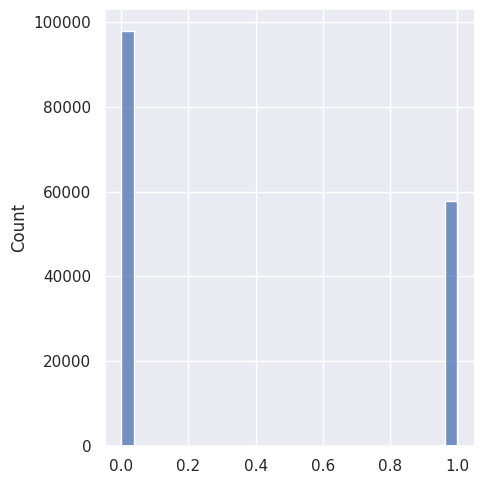

In [ ]:
sns.displot(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
len(X_train), len(X_valid)

(116888, 38963)

In [ ]:
X_train_sents = [' '.join(sent) for sent in X_train]
X_valid_sents = [' '.join(sent) for sent in X_valid]

In [ ]:
X_train_sents[10]

"DO NOT PAY FOR THIS APP IT IS A SCAM . I can bought one day , canceled my service , and it 's auto renewing it STILL and charging my account multiple times .. contacting my bank and reporting as fraudulent charges ."

In [ ]:
X_train_sent_lengths = list(map(len, X_train_sents))
X_valid_sent_lengths = list(map(len, X_valid_sents))

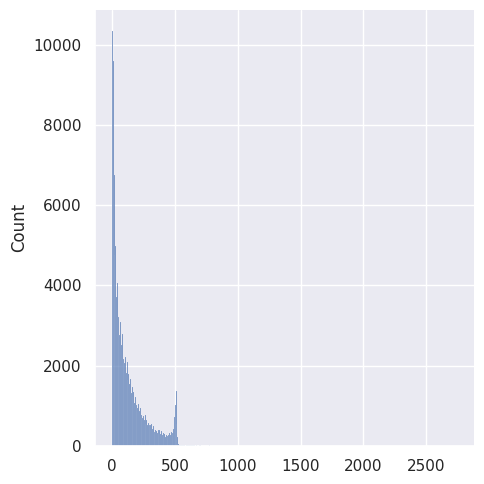

In [ ]:
sns.displot(X_train_sent_lengths, )

In [1]:
import parallel

ModuleNotFoundError: No module named 'parallel'

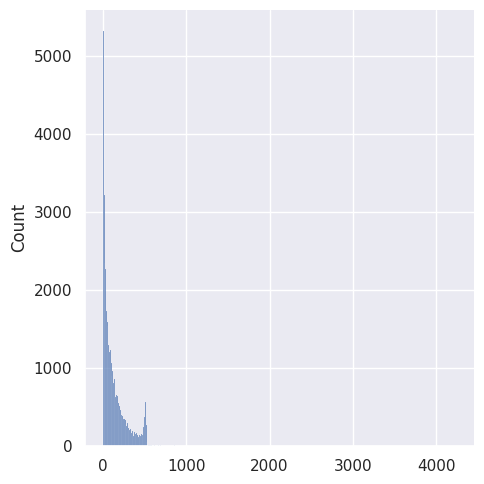

In [ ]:
sns.displot(X_valid_sent_lengths)

Word2Vec embeddings

In [ ]:
from gensim.models import Word2Vec

In [ ]:
X_train_sents[0]

"The concept is alright , though I have faced a couple of bad experiences and discrimination while I 've been on it , which is n't exactly pleasant ..."

In [ ]:
model_w2v = Word2Vec(X_train, vector_size=300, min_count=2)

In [ ]:
model_w2v.train(X_train, total_examples= len(X_train), epochs=10)

(22830842, 31495950)

In [ ]:
model_w2v.wv.most_similar(positive="game")

[('games', 0.5738871693611145),
 ('lotto', 0.46833336353302),
 ('facade', 0.4648529589176178),
 ('pockets', 0.4203679859638214),
 ('culture', 0.41569194197654724),
 ('dynamics', 0.41561242938041687),
 ('excuse', 0.4152882397174835),
 ('strategy', 0.40664491057395935),
 ('ball', 0.40594783425331116),
 ('typical', 0.403993159532547)]

In [ ]:
model_w2v.wv.most_similar(positive="fraud")

[('scam', 0.7134320139884949),
 ('fraudulent', 0.6951753497123718),
 ('disgrace', 0.6251537799835205),
 ('theft', 0.6137380599975586),
 ('ripoff', 0.5927152633666992),
 ('disgusting', 0.5867244601249695),
 ('unacceptable', 0.5722021460533142),
 ('pathetic', 0.5652192234992981),
 ('Fraud', 0.5616397857666016),
 ('Scam', 0.555608332157135)]

In [ ]:
len(model_w2v.wv)

22432

In [ ]:
def get_sentence_w2v_embed(sent):
    embeds = []
    for word in sent:
        if word in model_w2v.wv:
            embeds += [model_w2v.wv[word]]

    if len(embeds) > 0:
        embeds = np.stack(embeds, axis=0).mean(0)
    else:
        embeds = np.zeros((300, ))
    return embeds

In [ ]:
sent = X_train[0]

In [ ]:
for word in sent:
    print("word: ", word)
    print("w2v vector: ", model_w2v.wv[word])
    print("w2v vector shape: ", model_w2v.wv[word].shape)
    break

word:  The
w2v vector:  [ 0.06819558  1.0201086  -0.8757608   0.4800979  -0.40602574 -0.04256793
  2.6107807   0.61128354 -0.4911932  -1.1915334  -0.9149039   1.2696325
 -0.3706982   0.07850274  0.566626   -2.3382077  -0.12473557 -0.9713425
 -0.80368775  1.0146196   0.44308054 -1.8649513  -1.4346021  -0.58814377
  0.87104034 -0.49046937  1.4852319  -0.60607755  2.759552    0.7142361
  1.0868562   0.28538927 -0.8129106   0.40052173  0.573925    2.2791672
 -1.4333415  -0.5831874   0.88400275  0.8931264   0.60446227  0.29956973
  0.19586515 -1.2994584  -1.1830876  -1.8081123  -0.35924643 -0.20312183
  0.51552165  1.0957633   0.5669717   1.136779    0.45357618  2.73698
 -0.78907174  1.1981053   0.9850599   0.01221331 -0.38615286 -0.21716017
  0.53856015 -1.8910872   2.5156612   0.15566832 -0.32464853 -0.19781803
  0.7222516   1.1921883   2.1133225  -0.5624512  -0.15376465  0.671002
  0.39093423  1.7894894  -2.025818    0.6637805   0.25798205 -1.2429816
  2.0418732  -0.8949821   0.16152427 

In [ ]:
X_train_w2v_embeds = np.array([get_sentence_w2v_embed(sent) for sent in X_train])
X_valid_w2v_embeds = np.array([get_sentence_w2v_embed(sent) for sent in X_valid])

In [ ]:
X_train_w2v_embeds.shape

(116888, 300)

In [ ]:
X_valid_w2v_embeds.shape

(38963, 300)

Logistic regression baseline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_w2v = LogisticRegression(max_iter=1000).fit(X_train_w2v_embeds, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print(f"Train accuracy with W2V Vectorizer: {accuracy_score(y_train, log_reg_w2v.predict(X_train_w2v_embeds))}")
print(f"Validation accuracy with W2V Vectorizer: {accuracy_score(y_valid, log_reg_w2v.predict(X_valid_w2v_embeds))}")

Train accuracy with W2V Vectorizer: 0.8686520429813155
Validation accuracy with W2V Vectorizer: 0.867079023689141


TextCNN model

In [ ]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
BATCH_SIZE = 128
MODEL_BLOCKS = 2
MODEL_CHANNELS = 300
NUM_EPOCHS = 5
MAX_SEQUENCE_LENGTH = 512

In [ ]:
class EmbeddingsDataset(Dataset):
    def __init__(self, sents, targets, model, max_length):
        super().__init__()

        self.sents = sents
        self.targets = targets
        self.max_length = max_length
        self.model = model

    def __len__(self):
        return len(self.sents)

    def __getitem__(self, item):
        sent = self.sents[item]
        target = self.targets[item]
        length = min(self.max_length, len(sent))

        embeds = []
        for word in sent[:length]:
            if word in self.model.wv:
                embeds += [torch.from_numpy(self.model.wv[word])]

        length = min(length, len(embeds))

        if len(embeds) > 0:
            embeds = torch.stack(embeds, dim=1)
        else:
            length = 1
            embeds = torch.zeros(300, 1)
        # embeds = torch.stack(embeds, dim=1) # stacking embedding vectors as columns

        padding = torch.zeros((embeds.shape[0], self.max_length - length)) # zero columns

        embeds = torch.cat([embeds, padding], dim=1)

        return embeds, length, target

Exploring embedding dataset building

In [ ]:
arr = torch.rand(3, 5)
arr

tensor([[0.7936, 0.9249, 0.3812, 0.0654, 0.8797],
        [0.9269, 0.4712, 0.5502, 0.0459, 0.8271],
        [0.1561, 0.7945, 0.1975, 0.4503, 0.6820]])

In [ ]:
emb1 = torch.rand(10,)
emb2 = torch.rand(10,)

In [ ]:
emb_stack = torch.stack([emb1, emb2], dim=1)
emb_stack.shape

torch.Size([10, 2])

In [ ]:
emb_stack

tensor([[3.7901e-01, 2.6091e-01],
        [4.1415e-01, 1.3773e-01],
        [4.9599e-01, 3.1627e-01],
        [8.7821e-04, 4.1643e-01],
        [1.8894e-01, 2.8899e-01],
        [5.8188e-01, 5.8840e-01],
        [5.6158e-01, 2.3325e-01],
        [6.1099e-01, 8.9364e-01],
        [6.3813e-01, 6.1643e-01],
        [1.5886e-01, 9.6564e-01]])

In [ ]:
padding_emb = torch.zeros(10, 3)
padding_emb

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
result_emb = torch.cat([emb_stack, padding_emb], dim=1)
result_emb

tensor([[3.7901e-01, 2.6091e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.1415e-01, 1.3773e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.9599e-01, 3.1627e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.7821e-04, 4.1643e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.8894e-01, 2.8899e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.8188e-01, 5.8840e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.6158e-01, 2.3325e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [6.1099e-01, 8.9364e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [6.3813e-01, 6.1643e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5886e-01, 9.6564e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [ ]:
X_train_w2v_embeds.shape

(116888, 300)



---



In [ ]:
train_set = EmbeddingsDataset(X_train, y_train, max_length=MAX_SEQUENCE_LENGTH, model=model_w2v)
valid_set = EmbeddingsDataset(X_valid, y_valid, max_length=MAX_SEQUENCE_LENGTH, model=model_w2v)

In [ ]:
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
valid_loader = DataLoader(valid_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=4,  pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
len(next(iter(train_loader)))

3

In [ ]:
next(iter(train_loader))[0].shape

torch.Size([128, 300, 512])

In [ ]:
next(iter(train_loader))[1].shape

torch.Size([128])

In [ ]:
next(iter(train_loader))[2].shape

torch.Size([128])

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, num_channels, kernel_size):
        super().__init__()

        self.num_channels = num_channels
        self.kernel_size = kernel_size

        padding = (kernel_size - 1) // 2

        self.conv1 = nn.Conv1d(num_channels, num_channels, kernel_size=self.kernel_size, padding=padding, bias=False)
        self.bn1 = nn.BatchNorm1d(num_channels)

        self.conv2 = nn.Conv1d(num_channels, num_channels, self.kernel_size, padding=padding, bias=False)
        self.bn2 = nn.BatchNorm1d(num_channels)

        self.activation = nn.LeakyReLU(0.1)

    def forward(self, x):
        out = self.activation(self.bn1(self.conv1(x)))
        out = self.activation(self.bn2(self.conv2(x)) + x)
        return out

In [ ]:
class TextCNN(nn.Module):
    def __init__(self, num_blocks, num_channels, num_classes, kernel_size=5):
        super().__init__()

        self.num_blocks = num_blocks
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.kernel_size = kernel_size

        self.backbone = nn.Sequential(*[BasicBlock(self.num_channels, self.kernel_size) for _ in range(self.num_blocks)])
        self.classifier = nn.Linear(self.num_channels, self.num_classes)

    @staticmethod
    def get_lengths_mask(embeds, lengths):
        mask = torch.arange(embeds.shape[-1]).to(embeds.device)
        mask = (mask < lengths.unsqueeze(1)).to(torch.float)

        return mask.unsqueeze(1)

    def forward(self, embeds, lengths):
        # embeds: (B, C, T), lengths: (B, 1)
        features = self.backbone(embeds)
        # features: (B, C, T)
        mask = self.get_lengths_mask(embeds, lengths)
        # mask: (B, 1, T)
        features = (features * mask).sum(-1) / lengths.unsqueeze(1)
        # features: (B, C)
        logits = self.classifier(features)
        # logits: (B, num_classes)
        return logits


# Exploring TextCNN

In [ ]:
embeds = torch.rand(128, 300, 512)

In [ ]:
lengths = torch.randint(low=1, high=512, size=(128,))

In [ ]:
lengths

tensor([349, 133, 291, 261,  13, 441, 285, 197, 420, 260, 329,  86, 178,  29,
         45, 500,  45, 219, 104, 266, 189, 312, 307, 322, 130,  74, 236,  69,
        253, 261,  94, 365, 160,   2, 275, 158, 159, 143, 430, 293, 195, 368,
        250, 435,  31, 292,   7, 388, 260, 169, 360, 420,  34, 331, 224, 482,
        170, 410, 487, 466,  65, 360, 320, 453, 330, 403,  22, 127, 442, 347,
        345, 147, 224,  75, 500, 107, 347,  75, 386, 360, 112, 292, 220, 169,
        238, 295, 201, 278, 436, 385, 304,  85, 371, 466, 258, 357,   1,  38,
         32, 105, 482, 182, 100, 492,  25, 439, 284, 307, 437, 510, 130, 386,
        205, 171, 310, 420, 485,  64, 119,  90, 280, 279, 311, 280, 305,  85,
        425, 242])

In [ ]:
mask = torch.arange(embeds.shape[-1])

In [ ]:
mask.shape

torch.Size([512])

In [ ]:
mask

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [ ]:
lengths.unsqueeze(1).shape

torch.Size([128, 1])

In [ ]:
filter = (mask < lengths.unsqueeze(1)).to(torch.float).unsqueeze(1)

In [ ]:
filter[1, :]

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.,

In [ ]:
filter.shape

torch.Size([128, 1, 512])

In [ ]:
buff = filter * embeds

In [ ]:
buff

tensor([[[0.9203, 0.5659, 0.5056,  ..., 0.0000, 0.0000, 0.0000],
         [0.0185, 0.5100, 0.4356,  ..., 0.0000, 0.0000, 0.0000],
         [0.7459, 0.0636, 0.4964,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.4897, 0.2757, 0.3160,  ..., 0.0000, 0.0000, 0.0000],
         [0.8680, 0.5140, 0.0589,  ..., 0.0000, 0.0000, 0.0000],
         [0.8473, 0.2237, 0.2865,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2056, 0.7865, 0.4352,  ..., 0.0000, 0.0000, 0.0000],
         [0.5852, 0.5808, 0.6170,  ..., 0.0000, 0.0000, 0.0000],
         [0.6491, 0.9459, 0.5431,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.9529, 0.6152, 0.1494,  ..., 0.0000, 0.0000, 0.0000],
         [0.0277, 0.0335, 0.4167,  ..., 0.0000, 0.0000, 0.0000],
         [0.4334, 0.4018, 0.8101,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1159, 0.5974, 0.1634,  ..., 0.0000, 0.0000, 0.0000],
         [0.6904, 0.4289, 0.1701,  ..., 0.0000, 0.0000, 0.0000],
         [0.4617, 0.7290, 0.4986,  ..., 0.0000, 0.0000, 0.

In [ ]:
buff.shape

torch.Size([128, 300, 512])

In [ ]:
buff[0, 0, :234]

tensor([0.9203, 0.5659, 0.5056, 0.3618, 0.9333, 0.7807, 0.7249, 0.8671, 0.7336,
        0.2609, 0.4412, 0.2494, 0.2507, 0.9987, 0.9666, 0.0512, 0.0886, 0.7314,
        0.9323, 0.9274, 0.0234, 0.6106, 0.0238, 0.9691, 0.9149, 0.3515, 0.5392,
        0.1388, 0.7385, 0.9833, 0.3897, 0.7443, 0.3494, 0.9801, 0.5671, 0.8665,
        0.2866, 0.4473, 0.4466, 0.8743, 0.0157, 0.7879, 0.6123, 0.3911, 0.7571,
        0.8904, 0.7723, 0.5825, 0.0409, 0.5361, 0.6250, 0.0447, 0.6643, 0.4188,
        0.9849, 0.6695, 0.7015, 0.5385, 0.2830, 0.9644, 0.9197, 0.4250, 0.8755,
        0.4940, 0.4411, 0.9061, 0.3297, 0.8288, 0.6318, 0.7100, 0.5376, 0.0206,
        0.2121, 0.0585, 0.3064, 0.6387, 0.9646, 0.8603, 0.3068, 0.4454, 0.0689,
        0.1020, 0.2551, 0.1535, 0.0348, 0.5605, 0.5689, 0.3466, 0.5692, 0.3317,
        0.1632, 0.1557, 0.6036, 0.1683, 0.5985, 0.7010, 0.4336, 0.1713, 0.9967,
        0.5642, 0.2007, 0.5627, 0.1350, 0.3679, 0.3224, 0.5530, 0.4240, 0.8963,
        0.5570, 0.6986, 0.4867, 0.0202, 

In [ ]:
sum_buff = buff.sum(-1)

In [ ]:
sum_buff.shape

torch.Size([128, 300])

In [ ]:
mean_buff = sum_buff / lengths.unsqueeze(1)

In [ ]:
mean_buff.shape

torch.Size([128, 300])

In [ ]:
mean_buff

tensor([[0.5146, 0.5009, 0.5111,  ..., 0.5142, 0.4908, 0.5041],
        [0.5237, 0.5164, 0.5284,  ..., 0.4838, 0.4857, 0.5120],
        [0.5033, 0.5147, 0.5094,  ..., 0.5463, 0.4937, 0.5035],
        ...,
        [0.4756, 0.4852, 0.5521,  ..., 0.4454, 0.4936, 0.5199],
        [0.4881, 0.4781, 0.5127,  ..., 0.4953, 0.4962, 0.4996],
        [0.5475, 0.5083, 0.4989,  ..., 0.5179, 0.4658, 0.5089]])

# Model training

In [ ]:
def train_epoch(model, train_loader, optimizer, loss_fn, device):
    train_loss = 0
    train_accuracy = 0

    model.train()
    for embeds, lengths, labels in tqdm(train_loader):
        embeds = embeds[..., :lengths.max()]
        embeds, lengths, labels = embeds.to(device), lengths.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(embeds, lengths)
        loss = loss_fn(output, labels)
        train_loss += loss.item()
        train_accuracy += (torch.argmax(output, dim=1) == labels).sum().item()
        loss.backward()
        optimizer.step()

    return train_loss / len(train_loader.dataset), train_accuracy / len(train_loader.dataset)

In [ ]:
@torch.inference_mode()
def evaluate_epoch(model, valid_loader, loss_fn, device):
    valid_loss = 0
    valid_accuracy = 0

    model.eval()
    for embeds, lengths, labels in tqdm(valid_loader):
        embeds, lengths, labels = embeds.to(device), lengths.to(device), labels.to(device)

        output = model(embeds, lengths)
        loss = loss_fn(output, labels)
        valid_loss += loss.item()
        valid_accuracy += (torch.argmax(output, dim=1) == labels).sum().item()

    return valid_loss / len(valid_loader.dataset), valid_accuracy / len(valid_loader.dataset)

In [ ]:
from IPython.display import clear_output

In [ ]:
def plot_stats(
        train_loss_history,
        valid_loss_history,
        train_accuracy_history,
        valid_accuracy_history,
        title
):
    clear_output()

    plt.figure(figsize=(13, 6))

    plt.plot(train_loss_history, label='train loss')
    plt.plot(valid_loss_history, label='valid loss')

    plt.title(title + ' loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.legend()
    plt.show()

    plt.figure(figsize=(13, 6))

    plt.plot(train_accuracy_history, label='train acc')
    plt.plot(valid_accuracy_history, label='valid acc')

    plt.title(title + ' accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

    plt.legend()
    plt.show()

In [ ]:
def fit(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs, device, title, scheduler=None):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train_epoch(model, train_loader, optimizer, loss_fn, device)
        valid_loss, valid_accuracy = evaluate_epoch(model, valid_loader, loss_fn, device)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)
        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, title)

        if scheduler is not None:
            scheduler.step()

In [ ]:
model = TextCNN(num_blocks=MODEL_BLOCKS, num_channels=MODEL_CHANNELS, num_classes=2, kernel_size=5)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
model = model.to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, NUM_EPOCHS)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from tqdm.notebook import tqdm

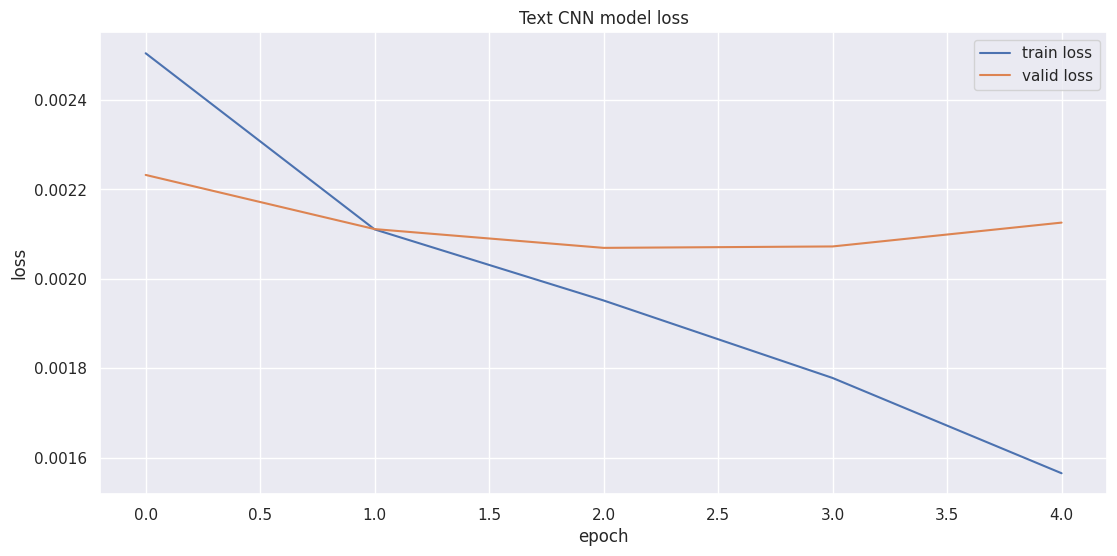

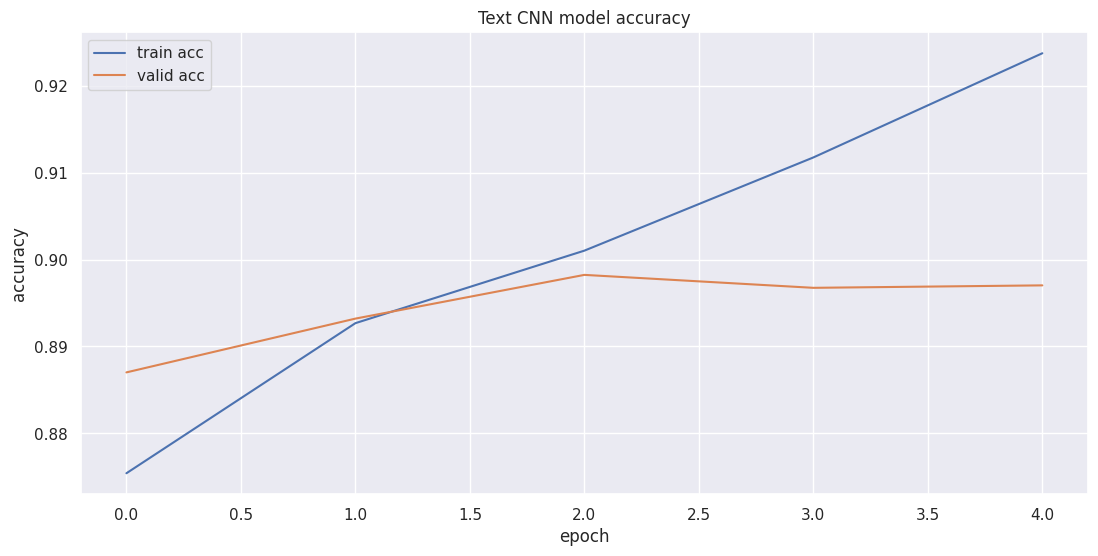

In [ ]:
fit(model, train_loader, valid_loader, optimizer, loss_fn, NUM_EPOCHS, device,  'Text CNN model', scheduler)